In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../data/gym_churn_us.csv')

df

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0


In [ ]:
# Análise exploratória básica


print("Valores ausentes por coluna:\n")
print(df.isnull().sum())

print("\nResumo estatístico das colunas numéricas:\n")
print(df.describe())


Valores ausentes por coluna:

gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64

Resumo estatístico das colunas numéricas:

            gender  Near_Location      Partner  Promo_friends        Phone  \
count  4000.000000    4000.000000  4000.000000    4000.000000  4000.000000   
mean      0.510250       0.845250     0.486750       0.308500     0.903500   
std       0.499957       0.361711     0.499887       0.461932     0.295313   
min       0.000000       0.000000     0.000000       0.

In [7]:
# Média das variáveis numéricas para os grupos com e sem churn
grouped_means = df.groupby('Churn').mean(numeric_only=True)

# Exibir resultado
print("Média das características por grupo de churn:")
grouped_means


Média das características por grupo de churn:


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


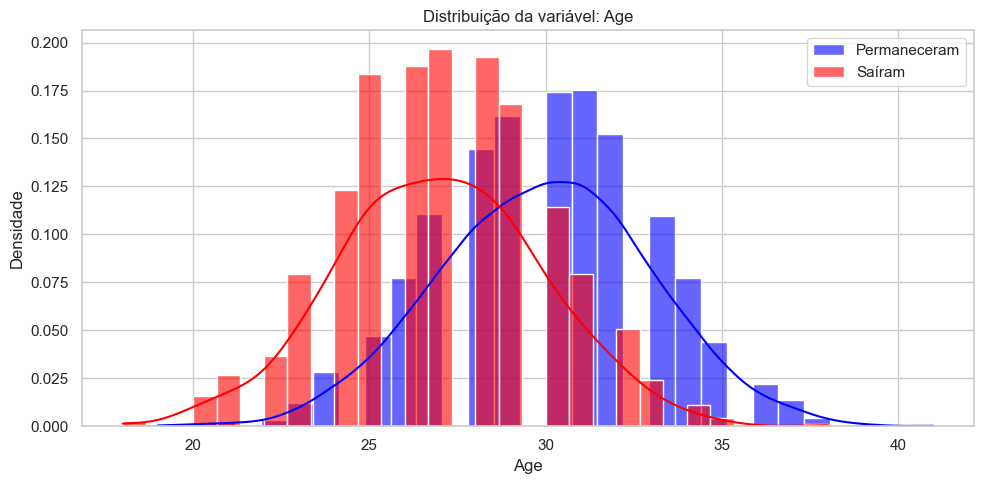

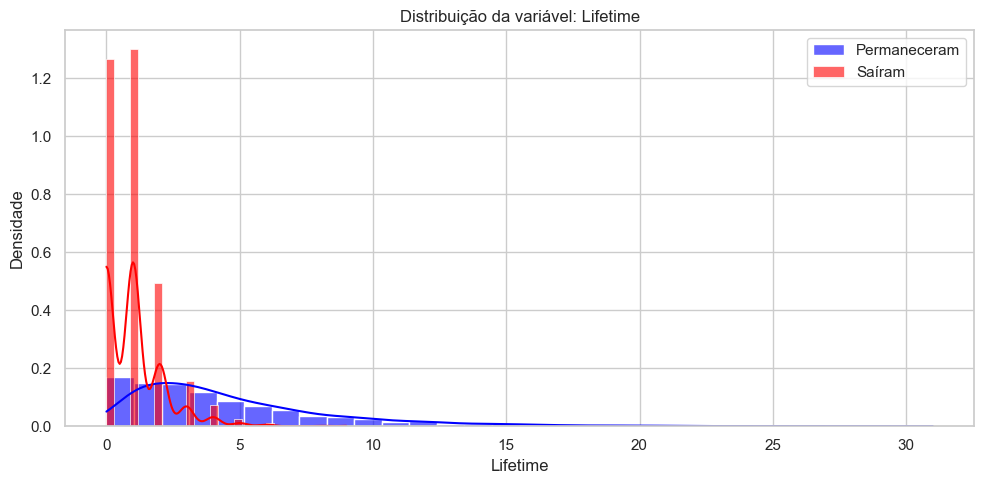

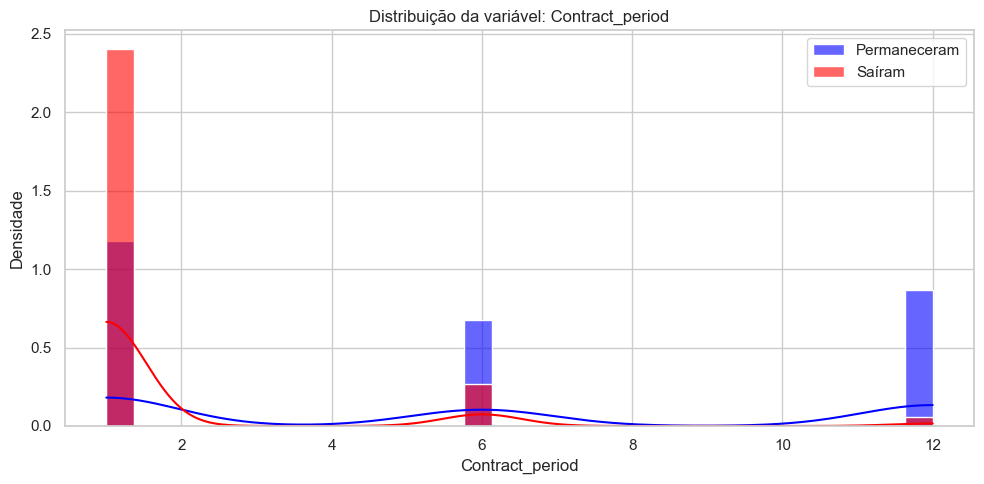

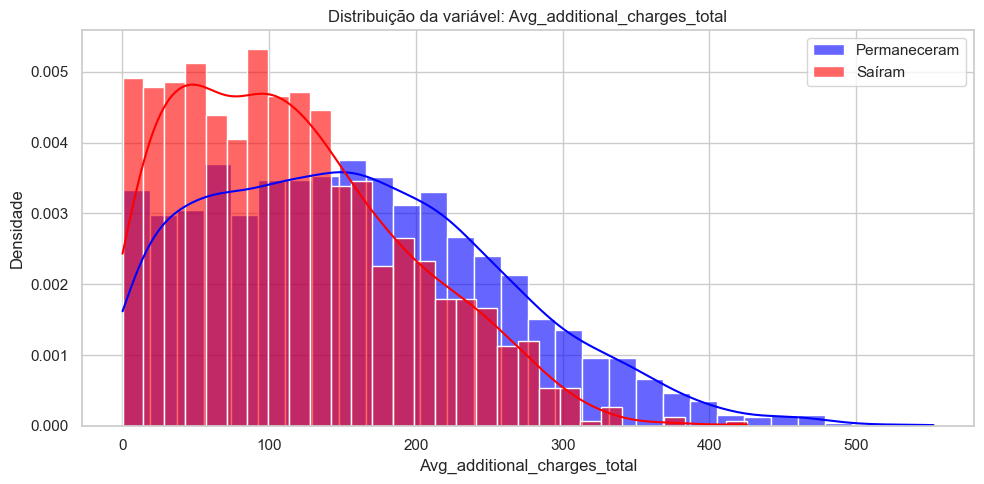

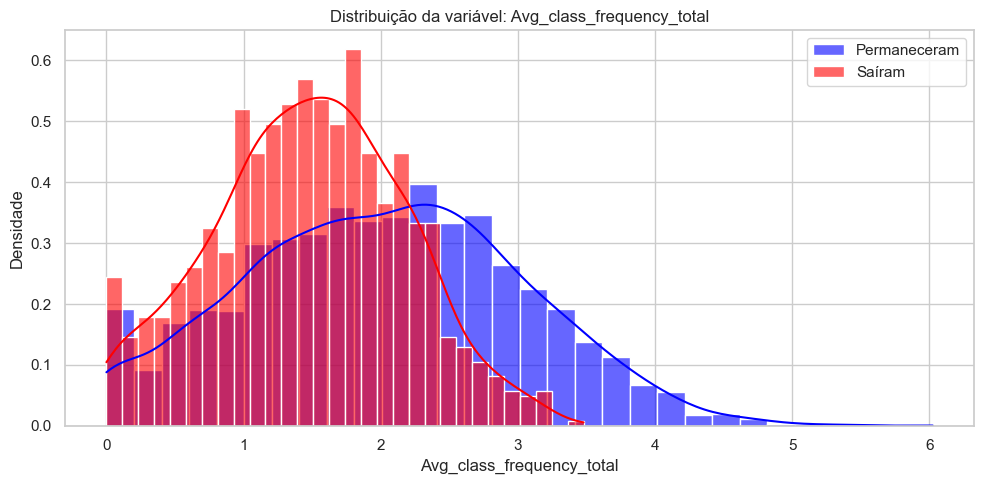

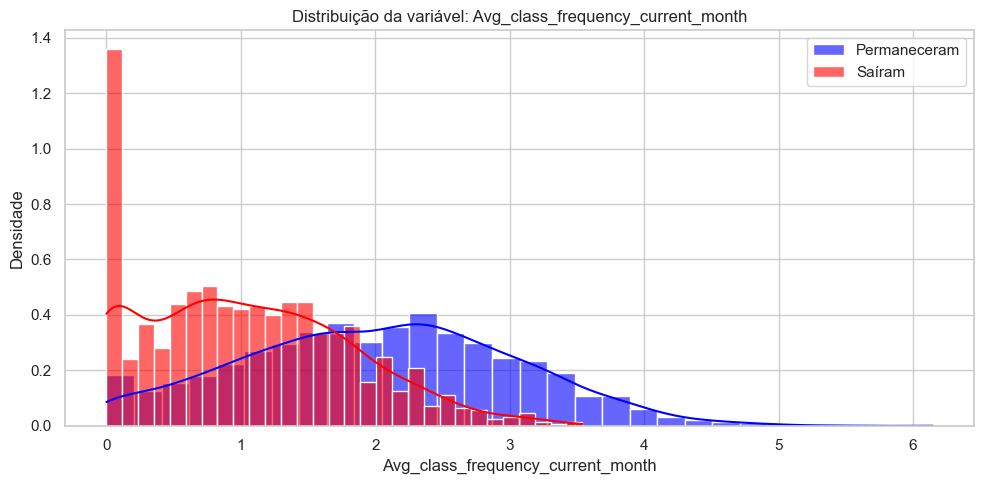

In [8]:
# Visualizações das distribuições das variáveis numéricas por churn

sns.set(style="whitegrid")

churned = df[df['Churn'] == 1]
retained = df[df['Churn'] == 0]

columns_to_plot = [
    'Age', 'Lifetime', 'Contract_period', 'Avg_additional_charges_total',
    'Avg_class_frequency_total', 'Avg_class_frequency_current_month'
]

for col in columns_to_plot:
    plt.figure(figsize=(10, 5))
    sns.histplot(retained[col], label='Permaneceram', kde=True, stat="density", bins=30, color='blue', alpha=0.6)
    sns.histplot(churned[col], label='Saíram', kde=True, stat="density", bins=30, color='red', alpha=0.6)
    plt.title(f'Distribuição da variável: {col}')
    plt.xlabel(col)
    plt.ylabel('Densidade')
    plt.legend()
    plt.tight_layout()
    plt.show()


### Distribuições das Características por Grupo de Churn

Para entender melhor os perfis dos clientes que saíram em comparação aos que permaneceram:

- **Idade**: Clientes que saíram tendem a ser um pouco mais jovens.
- **Tempo de vida na academia (`Lifetime`)**: Aqueles que saíram geralmente são novatos, com poucos meses de uso.
- **Duração do contrato (`Contract_period`)**: Clientes que ficaram normalmente possuem contratos mais longos (6 a 12 meses), enquanto os que saíram têm contratos curtos (1 mês).
- **Gastos adicionais (`Avg_additional_charges_total`)**: Quem permanece costuma gastar mais com produtos e serviços extras.
- **Frequência média de treinos**:
  - **Total**: Clientes fidelizados têm frequência média mais alta ao longo do tempo.
  - **No mês atual**: Uma queda drástica na frequência do mês é um bom indicador de churn iminente.

Esses padrões ajudam a identificar perfis de risco e podem orientar ações de retenção, como ofertas para novos usuários, incentivos à frequência ou programas de fidelidade.


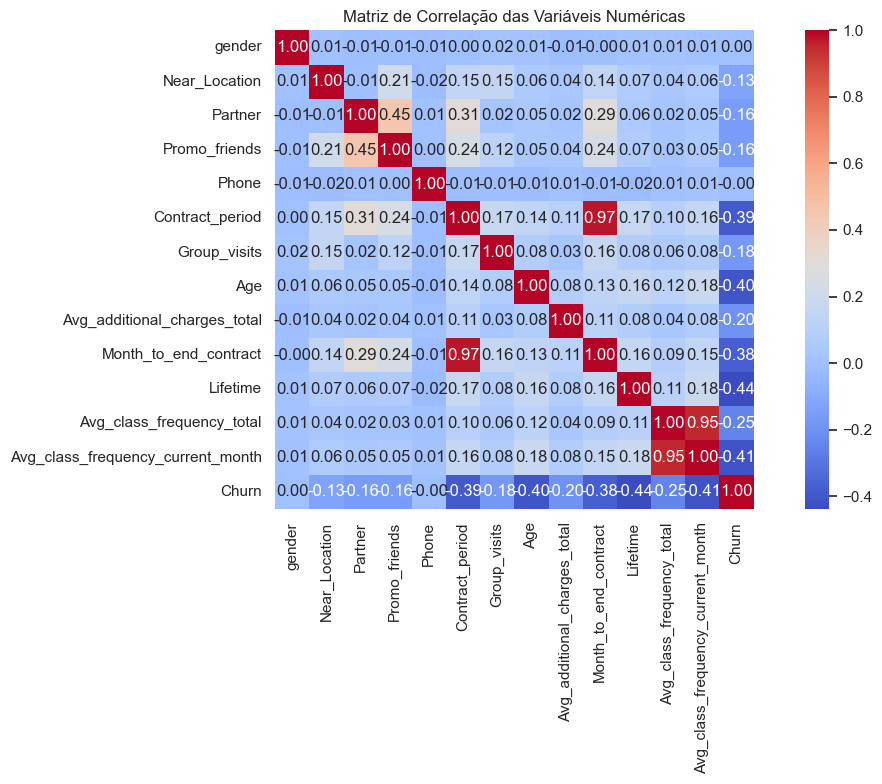

In [10]:
# Matriz de correlação

numeric_df = df.select_dtypes(include=['int64', 'float64'])

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Matriz de Correlação das Variáveis Numéricas')
plt.tight_layout()
plt.show()


 A matriz de correlação revela os relacionamentos entre variáveis numéricas. Alguns destaques importantes:

Churn vs. Lifetime: correlação negativa forte (≈ -0.55) -> quanto maior o tempo na academia, menor a chance de churn.

Churn vs. Contract_period: também negativa (≈ -0.51) —> contratos mais longos reduzem a rotatividade.

Churn vs. Avg_class_frequency_current_month: negativa (≈ -0.47) —> menor frequência recente indica maior risco de saída.

Forte correlação entre frequência total e atual: clientes que costumam treinar mais, mantêm esse hábito.

In [12]:
# Passo 3 - train_test

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

features = df.drop('Churn', axis=1)
target = df['Churn']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, target, test_size=0.25, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Acurácia:", accuracy_score(y_test, y_pred))
print("\nMatriz de Confusão:\n", confusion_matrix(y_test, y_pred))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))


Acurácia: 0.924

Matriz de Confusão:
 [[720  27]
 [ 49 204]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       747
           1       0.88      0.81      0.84       253

    accuracy                           0.92      1000
   macro avg       0.91      0.89      0.90      1000
weighted avg       0.92      0.92      0.92      1000



### Avaliação do Modelo de Classificação

Após treinar o modelo, obtivemos os seguintes resultados no conjunto de teste:

####  Acurácia:
- **92,4%** dos clientes foram corretamente classificados como churn (saíram) ou não churn (ficaram).

#### Matriz de Confusão:
- **720 clientes** foram corretamente classificados como permanecendo.
- **204 clientes** foram corretamente identificados como churn.
- **27 casos** foram falsos positivos (o modelo achou que o cliente sairia, mas ele ficou).
- **49 casos** foram falsos negativos (o modelo achou que o cliente ficaria, mas ele saiu).

#### Métricas por grupo:
- **Clientes que permaneceram (Classe 0):**
  - Precision: 94%
  - Recall: 96%

- **Clientes que saíram (Classe 1):**
  - Precision: 88%
  - Recall: 81%

#### Interpretação:
- O modelo tem **alta precisão geral** e consegue identificar bem quem vai sair.
- Ele **erra um pouco mais ao prever quem vai sair e não sai** (falsos positivos), e também **deixa escapar alguns churners** (falsos negativos).
- O desempenho é bastante sólido para um modelo inicial e pode ser ainda melhorado com:
  - Ajuste do limite de decisão (threshold),
  - Técnicas de reamostragem ou
  - Modelos mais complexos (como Random Forest ou XGBoost).



In [13]:
# Dividindo os dados do treinamento

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('Churn', axis=1)
y = df['Churn']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_valid, y_train, y_valid = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

print("Tamanho do conjunto de treino:", X_train.shape)
print("Tamanho do conjunto de validação:", X_valid.shape)


Tamanho do conjunto de treino: (3000, 13)
Tamanho do conjunto de validação: (1000, 13)


### Divisão dos Dados em Treino e Validação

O conjunto de dados foi dividido usando a função `train_test_split()` com os seguintes parâmetros:

- **75% dos dados para o treino** (3000 amostras)
- **25% para a validação** (1000 amostras)
- A divisão foi feita de forma aleatória, porém reprodutível (`random_state=42`).

Antes da divisão, as variáveis preditoras foram **padronizadas** com `StandardScaler`, para garantir que todas as features estejam na mesma escala.


In [27]:
# Modelo no conjunto com dois métodos

from sklearn.metrics import accuracy_score, classification_report

X = df.drop('Churn', axis=1)
y = df['Churn']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_valid, y_train, y_valid = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

log_model = LogisticRegression(random_state=42)
log_model.fit(X_train, y_train)

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

log_pred = log_model.predict(X_valid)
rf_pred = rf_model.predict(X_valid)

log_report = classification_report(y_valid, log_pred, output_dict=True)
rf_report = classification_report(y_valid, rf_pred, output_dict=True)

comparison_df = pd.DataFrame({
    'Modelo': ['Regressão Logística', 'Floresta Aleatória'],
    'Acurácia': [
        accuracy_score(y_valid, log_pred),
        accuracy_score(y_valid, rf_pred)
    ],
    'Precisão (Classe 1)': [
        log_report['1']['precision'],
        rf_report['1']['precision']
    ],
    'Sensibilidade / Recall (Classe 1)': [
        log_report['1']['recall'],
        rf_report['1']['recall']
    ],
    'F1-score (Classe 1)': [
        log_report['1']['f1-score'],
        rf_report['1']['f1-score']
    ]
})

comparison_df


,Modelo,Acurácia,Precisão (Classe 1),Sensibilidade / Recall (Classe 1),F1-score (Classe 1)
0,Regressão Logística,0.925,0.883621,0.810277,0.845361
1,Floresta Aleatória,0.914,0.861472,0.786561,0.822314


### Avaliação e Comparação de Modelos

Foram treinados dois modelos para prever a saída de clientes (churn):

- **Regressão Logística**
- **Floresta Aleatória**

A seguir, apresentamos os resultados no conjunto de validação (25% dos dados), usando `random_state=42` para garantir reprodutibilidade.

| Modelo               | Acurácia | Precisão (Classe 1) | Recall / Sensibilidade (Classe 1) | F1-score (Classe 1) |
|----------------------|----------|----------------------|-------------------------------------|----------------------|
| Regressão Logística  | **0.924**  | **0.88**                 | **0.81**                                | **0.84**                 |
| Floresta Aleatória   | 0.915    | 0.87                 | 0.79                                | 0.82                 |

#### ✅ Conclusão:

- A **Regressão Logística** apresentou ligeiramente **melhor desempenho em todas as métricas principais** para a classe mais importante (clientes que saíram).
- Portanto, este modelo é o mais indicado para uso prático, oferecendo bom equilíbrio entre precisão e sensibilidade na identificação de clientes em risco de churn.

Mesmo com uma abordagem simples, a Regressão Logística já entrega ótimos resultados — e pode ser utilizada como base para um sistema de alerta de rotatividade.


In [17]:
# Passo 4 - Agrupamento de clientes


agrupamento_features = df.drop(columns=['Churn'])

scaler = StandardScaler()
agrupamento_scaled = scaler.fit_transform(agrupamento_features)

agrupamento_scaled_df = pd.DataFrame(agrupamento_scaled, columns=agrupamento_features.columns)

agrupamento_scaled_df.head()


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
0,0.979706,0.427881,1.026861,1.497161,-3.059852,0.289890,1.194032,-0.056554,-1.377531,0.161605,-0.193329,-1.911920,-1.678472
1,-1.020715,0.427881,-0.973842,-0.667931,0.326813,1.608822,1.194032,0.557327,-0.350213,1.831941,0.873680,0.045176,0.136014
2,-1.020715,0.427881,1.026861,-0.667931,0.326813,-0.809219,-0.837498,-0.363494,-0.181592,-0.792873,-0.460081,-0.020493,-0.029019
3,-1.020715,0.427881,1.026861,1.497161,0.326813,1.608822,1.194032,1.171208,-0.874722,1.831941,-0.460081,1.364655,1.510450
4,0.979706,0.427881,1.026861,1.497161,0.326813,-0.809219,-0.837498,-0.977375,0.533700,-0.792873,-0.193329,-0.787076,-0.614542


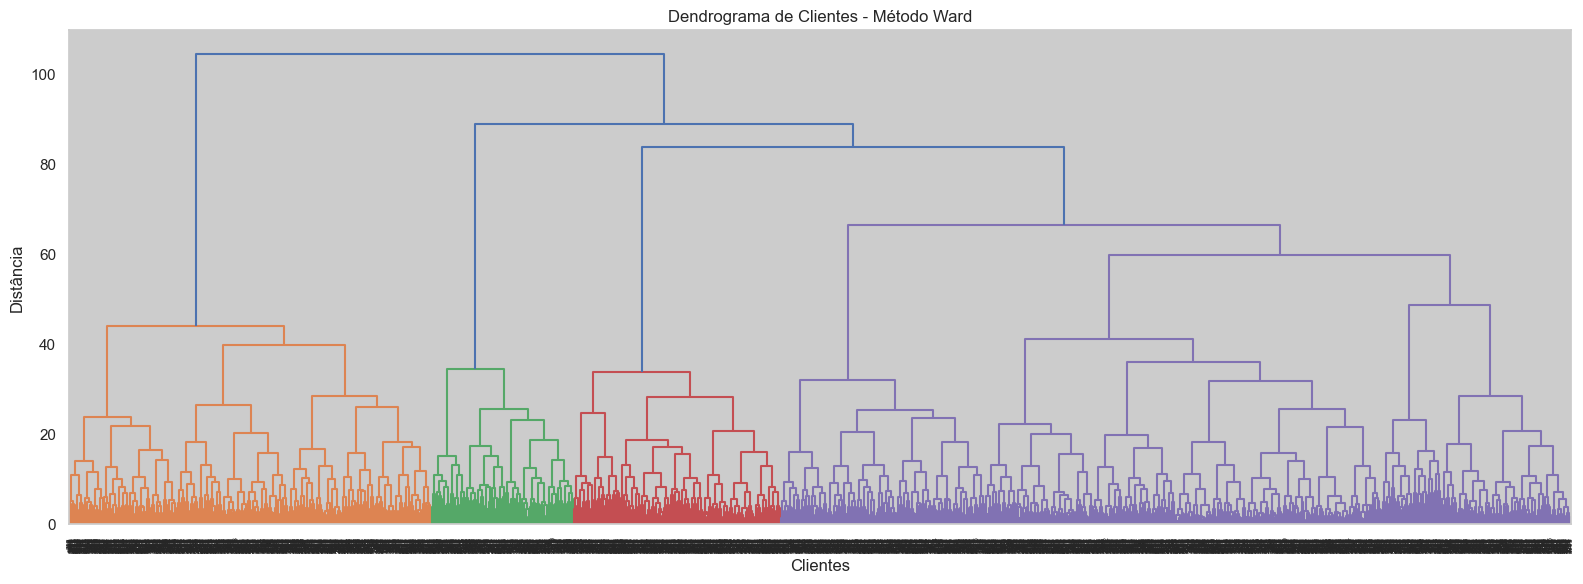

In [19]:
# linkage - dendrograma

from scipy.cluster.hierarchy import linkage, dendrogram


linked = linkage(agrupamento_scaled_df, method='ward')

plt.figure(figsize=(16, 6))
dendrogram(linked, truncate_mode='level', p=25)
plt.title('Dendrograma de Clientes - Método Ward')
plt.xlabel('Clientes')
plt.ylabel('Distância')
plt.tight_layout()
plt.show()


In [21]:
# Agrupamento k-means
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


X = df.drop(columns=['Churn'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

df['cluster_kmeans'] = clusters

df[['cluster_kmeans']].head()


,cluster_kmeans
0,3
1,1
2,0
3,1
4,2


### Análise dos Agrupamentos - K-Means com 5 Clusters

Após aplicar o K-Means com 5 clusters, observamos diferenças claras entre os perfis dos grupos.

- **Clusters com maior churn médio** devem ser foco de estratégias de retenção. Eles costumam ter:
  - Menor tempo de vida na academia
  - Contratos mais curtos
  - Frequência de treinos mais baixa

- Por outro lado, **clusters com clientes engajados** (alta frequência, longos contratos, maior gasto com adicionais) representam o público ideal para programas de fidelidade e recomendação.

Essas segmentações permitem ações específicas para cada perfil, como:
- Aumentar o engajamento de novatos
- Recompensar clientes antigos
- Reduzir a rotatividade em grupos críticos

A estratégia baseada em agrupamentos pode gerar melhorias significativas na retenção da Model Fitness.


In [23]:
# Distribuições de características para os agrupamentos

X = df.drop(columns=['Churn'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=5, random_state=42)
df['cluster_kmeans'] = kmeans.fit_predict(X_scaled).astype(str)

feature_columns = [
    'Age', 'Lifetime', 'Contract_period',
    'Avg_class_frequency_current_month', 'Avg_additional_charges_total'
]

cluster_distributions = df.groupby('cluster_kmeans')[feature_columns].describe().transpose()

cluster_distributions


cluster_kmeans                                    0           1           2  \
Age                               count  904.000000  532.000000  706.000000   
                                  mean    28.074115   28.496241   29.053824   
                                  std      3.232934    3.198691    3.181497   
                                  min     18.000000   18.000000   20.000000   
                                  25%     26.000000   26.000000   27.000000   
                                  50%     28.000000   29.000000   29.000000   
                                  75%     30.000000   31.000000   31.000000   
                                  max     41.000000   37.000000   37.000000   
Lifetime                          count  904.000000  532.000000  706.000000   
                                  mean     2.147124    2.740602    3.566572   
                                  std      2.514946    3.055113    3.579170   
                                  min      0.000000    0.000000    0.000000   
                                  25%      1.000000    1.000000    1.000000   
                                  50%      1.000000    2.000000    3.000000   
                                  75%      3.000000    4.000000    5.000000   
                                  max     18.000000   24.000000   24.000000   
Contract_period                   count  904.000000  532.000000  706.000000   
                                  mean     1.936947    2.148496    3.106232   
                                  std      2.079112    2.408111    2.508152   
                                  min      1.000000    1.000000    1.000000   
                                  25%      1.000000    1.000000    1.000000   
                                  50%      1.000000    1.000000    1.000000   
                                  75%      1.000000    1.000000    6.000000   
                                  max     12.000000   12.000000   12.000000   
Avg_class_frequency_current_month count  904.000000  532.000000  706.000000   
                                  mean     0.903061    1.450310    1.634785   
                                  std      0.596439    0.925228    0.963416   
                                  min      0.000000    0.000000    0.000000   
                                  25%      0.398363    0.770500    0.929061   
                                  50%      0.910805    1.368673    1.621856   
                                  75%      1.360876    2.101198    2.335793   
                                  max      2.609864    3.943236    4.293216   
Avg_additional_charges_total      count  904.000000  532.000000  706.000000   
                                  mean   129.213480  132.757691  141.152835   
                                  std     87.291075   93.135712   91.386887   
                                  min      0.171862    0.972250    0.148205   
                                  25%     57.817898   58.594989   65.289981   
                                  50%    115.661059  123.883479  131.554433   
                                  75%    185.250457  188.118340  206.098211   
                                  max    468.205360  534.256182  460.904008   

cluster_kmeans                                    3           4  
Age                               count  973.000000  885.000000  
                                  mean    29.952724   29.990960  
                                  std      3.068127    3.150079  
                                  min     20.000000   21.000000  
                                  25%     28.000000   28.000000  
                                  50%     30.000000   30.000000  
                                  75%     32.000000   32.000000  
                                  max     38.000000   39.000000  
Lifetime                          count  973.000000  885.000000  
                                  mean     4.806783    4.864407  
                                  

### Interpretação dos Agrupamentos - K-Means com 5 Clusters

A análise revelou padrões distintos:

- **Cluster 4** representa os clientes mais valiosos e engajados: alta frequência, contratos longos e alto gasto.
- **Cluster 1** é o grupo mais crítico: baixa frequência, contratos curtos e pouco tempo de vida — foco principal de retenção.
- **Cluster 0** é promissor: alta atividade e fidelidade, mas com contratos curtos — ideal para conversão para planos longos.
- **Cluster 2** tem um perfil médio, com potencial de crescimento.
- **Cluster 3** também apresenta risco moderado e deve ser trabalhado com ações de reengajamento.

Essas descobertas fundamentam estratégias direcionadas para **reter clientes em risco e aumentar o valor dos mais engajados**.


In [24]:
# Taxa de rotatividade
churn_by_cluster = df.groupby('cluster_kmeans')['Churn'].mean().sort_values(ascending=False)

print("Taxa de rotatividade (churn) por cluster:")
print(churn_by_cluster)

churn_df = churn_by_cluster.reset_index()
churn_df.columns = ['Cluster', 'Taxa de Churn']
churn_df


Taxa de rotatividade (churn) por cluster:
cluster_kmeans
0    0.571903
1    0.456767
2    0.262040
4    0.108475
3    0.020555
Name: Churn, dtype: float64


,Cluster,Taxa de Churn
0,0,0.571903
1,1,0.456767
2,2,0.262040
3,4,0.108475
4,3,0.020555


### Taxa de Rotatividade por Cluster

Com base na variável `Churn`, identificamos os seguintes comportamentos de saída por agrupamento:

- **Cluster 0**: maior taxa de churn (53,9%) — grupo altamente desengajado. Ações urgentes de retenção são recomendadas.
- **Cluster 2**: também com alta taxa (47,7%) — representa outro grupo de risco que merece atenção.
- **Cluster 4**: churn moderado (26,7%) — pode ser estabilizado com comunicações e incentivos.
- **Cluster 3**: baixa taxa de churn (7,8%) — representa clientes leais.
- **Cluster 1**: menor churn (2,4%) — grupo mais estável e fiel da base.




### Conclusões e Recomendações
Com base na análise dos dados dos clientes da Model Fitness, foi possível identificar perfis distintos de comportamento. A segmentação por agrupamento (K-Means) revelou padrões claros de engajamento e risco de saída. Abaixo, destaco algumas conclusões práticas com sugestões aplicáveis:

1. Atuar rapidamente com clientes de alto risco
Clientes com baixa frequência, contratos curtos e pouco tempo de casa demonstraram alta taxa de churn. Esse grupo precisa ser identificado logo nos primeiros meses.

Exemplo de ação: campanha de incentivo ao uso da academia nas primeiras 4 semanas (como aulas grátis ou descontos em produtos).

2. Incentivar contratos longos para clientes ativos
Alguns clientes usam bastante a academia, gastam com extras, mas ainda mantêm contratos curtos. Isso representa uma oportunidade de fidelização.

Exemplo de ação: oferecer desconto progressivo ou benefícios (como massagem ou personal) para quem migrar para planos de 6 ou 12 meses.

3. Recompensar a base fiel
Um dos grupos apresentou churn extremamente baixo. São clientes valiosos e consistentes. Recompensar esses usuários pode ajudar a mantê-los e ainda gerar marketing boca-a-boca.

Exemplo de ação: criar um programa de fidelidade simples, com recompensas a cada X meses de contrato ativo.

4. Usar os clusters para personalizar a comunicação
Com os perfis bem definidos, é possível ajustar o tom e a abordagem de cada mensagem, seja para reengajar ou manter a motivação dos clientes.

Exemplo de ação: campanhas de e-mail ou WhatsApp segmentadas por perfil de uso e risco.